# Outlier: o ponto fora da curva.

"Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto" (Hawkins, 1980).

Como um outlier pode afetar o desempenho do seu algoritmo? Como são gerados? Como detectar? Como tratar? Essas são algumas perguntas que tentarei responder nesse pequeno estudo.

## Tipos de Outliers

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Outlier univariado

Text(0,0.5,'N° de anos')

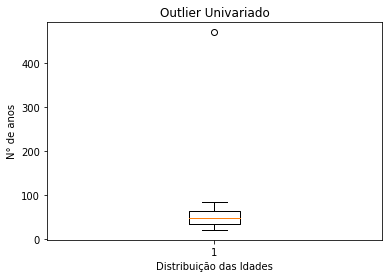

In [15]:
np.random.seed(5)
idade = np.random.randint(20,85, size=100)
idade[10]=470
plt.boxplot(idade, 0, 'o')
plt.title('Outlier Univariado')
plt.xlabel('Distribuição das Idades')
plt.ylabel('N° de anos')

#### Outlier multivariado

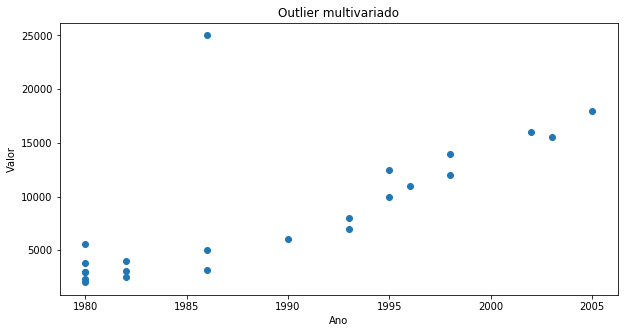

In [16]:
fig = plt.figure(figsize=(10,5))
ano = [1980,1982,1986,1980,1980,1982,1986,1980,1980,1982,1986,1980,1990,1993,1993,1995,1996,1995,1998,1998,2002,2003,2005]
valor = [2000,2500,3200,2300,3000,3100,5000,5600,3000,4000,3000,3800,6000,7000,8000,10000,11000,12500,12000,14000,16000,15500,18000]
valor[10]=25000
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Outlier multivariado')
plt.plot(ano, valor, "o")

## Efeito dos outliers em análises estatísticas: sem outliers

In [17]:
data = pd.DataFrame({'Nome': ['José Carlos', 'Manuel da Silva', 'Maria Leite','Antônio Siveira','Pedro Lemos'],'Idade': [33, 57, 27,47,44]})
data = data[['Nome','Idade']]

In [18]:
data

,Nome,Idade
0,José Carlos,33
1,Manuel da Silva,57
2,Maria Leite,27
3,Antônio Siveira,47
4,Pedro Lemos,44


#### Medidas estatísticas

In [19]:
# Média:
print('Média:', data.Idade.mean())
# Mediana:
print('Mediana:', data.Idade.median())
# Quantil:
print('Quantil:',data.Idade.quantile(q=0.25))
# Amplitude:
print('Amplitude:',data.Idade.max() - data.Idade.min())
# Desvio Padrão:
print('Desvio Padrão:',data.Idade.std())
# Desvio absoluto:
print('Desvio absoluto:',data.Idade.mad())

Média: 41.6
Mediana: 44.0
Quantil: 33.0
Amplitude: 30
Desvio Padrão: 11.823705003085962
Desvio absoluto: 9.28


## Efeito dos outliers em análises estatísticas: com outliers

In [24]:
data = pd.DataFrame({'Nome': ['José Carlos', 'Manuel da Silva', 'Maria Leite','Antônio Siveira','Pedro Lemos'],'Idade': [33, 57, 27,470,44]})
data = data[['Nome','Idade']]

In [21]:
data

,Nome,Idade
0,José Carlos,33
1,Manuel da Silva,57
2,Maria Leite,27
3,Antônio Siveira,470
4,Pedro Lemos,44


#### Medidas estatísticas

In [25]:
# Média:
print('Média:', data.Idade.mean())
# Mediana:
print('Mediana:', data.Idade.median())
# Amplitude:
print('Amplitude:',data.Idade.max() - data.Idade.min())
# Desvio Padrão:
print('Desvio Padrão:',data.Idade.std())
# Desvio absoluto:
print('Desvio absoluto:',data.Idade.mad())

Média: 126.2
Mediana: 44.0
Amplitude: 443
Desvio Padrão: 192.52973796273656
Desvio absoluto: 137.52000000000004


## Efeito outlier

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Conjunto de dados sem a presença de outliers

In [27]:
np.random.seed(4)
x = np.random.normal(0, 40, 20)
y = 10 + 3 * x + np.random.normal(0, 30, 20)

In [28]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [29]:
regr = linear_model.LinearRegression()

In [30]:
# Train the model using the training sets
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred = regr.predict(x)

In [33]:
mean_absolute_error(y, y_pred) # sem outlier

29.880064234378445

Text(0.5,1,'Conjunto de dados sem Outliers')

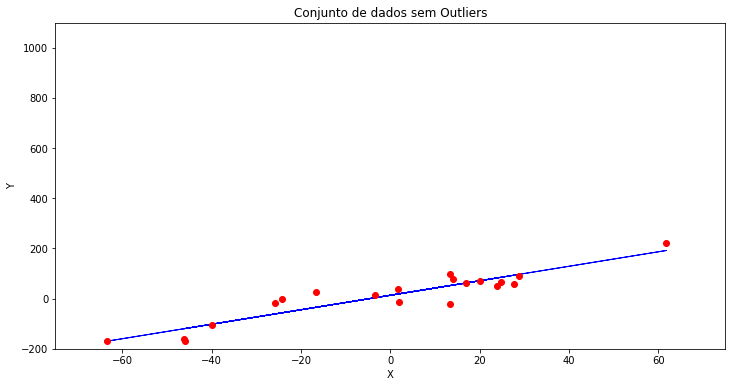

In [34]:
# Plotar o gráfico
fig = plt.figure(figsize=(12,6))
axes = plt.gca()
axes.set_xlim([-75,75])
axes.set_ylim([-200,1100])
plt.plot(x,y_pred, color='blue', linewidth=1)
plt.plot(x, y, "o",color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de dados sem Outliers')

#### Conjunto de dados com a presença de outliers

In [35]:
np.random.seed(4)
x = np.random.normal(0, 40, 20)
y = 10 + 3 * x + np.random.normal(0, 30, 20)
y[18] = 900 # outlier
y[19] = 950

In [36]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [37]:
regr = linear_model.LinearRegression()

In [38]:
# Train the model using the training sets
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
y_pred = regr.predict(x)

In [40]:
mean_absolute_error(y, y_pred) # Com outlier

152.15357811237214

Text(0.5,1,'Conjunto de dados com Outliers')

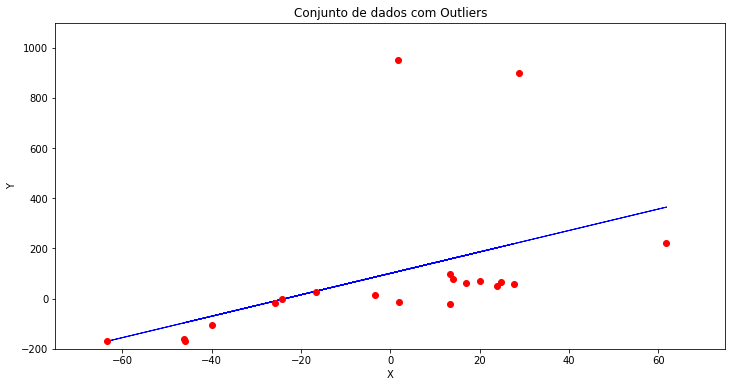

In [41]:
# Plotar gráfico
fig = plt.figure(figsize=(12,6))
axes = plt.gca()
axes.set_xlim([-75,75])
axes.set_ylim([-200,1100])
plt.plot(x,y_pred, color='blue', linewidth=1)
plt.plot(x, y, "o",color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de dados com Outliers')

## Detectando outliers

In [42]:
temp = pd.DataFrame({'Sensor': ['Sensor 1', 'Sensor 2', 'Sensor 3','Sensor 4','Sensor 5','Sensor 6','Sensor 7','Sensor 8','Sensor 9','Sensor 10','Sensor 11','Sensor 12'],'Temperatura °C': [71, 70, 73,70,70,69,70,72,71,300,71,69]})
temp = temp[['Sensor','Temperatura °C']]

In [43]:
temp

,Sensor,Temperatura °C
0,Sensor 1,71
1,Sensor 2,70
2,Sensor 3,73
3,Sensor 4,70
4,Sensor 5,70
5,Sensor 6,69
6,Sensor 7,70
7,Sensor 8,72
8,Sensor 9,71
9,Sensor 10,300


In [44]:
# Ordenando os valores:
np.sort(temp['Temperatura °C'])

array([ 69,  69,  70,  70,  70,  70,  71,  71,  71,  72,  73, 300],
      dtype=int64)

In [45]:
# Calculando a mediana
temp['Temperatura °C'].median()

70.5

In [46]:
# Calculando o quartil inferior 
q1 = temp['Temperatura °C'].quantile(q=0.25)
print(q1)

70.0


In [47]:
# Calculando o quartil superior
q3 = temp['Temperatura °C'].quantile(q=0.75)
print(q3)

71.25


In [52]:
# Calcular a barreira interna
# Amplitude interquartílica: outliers moderados
amp = q3 - q1
lim_max_i = q3 + 1.5 * amp 
lim_min_i = q1 - 1.5 * amp 

In [49]:
# Calcular a barreira externa
# Amplitude interquartílica: outliers extremos
amp = q3 - q1
lim_max_e = q3 + 3 * amp 
lim_min_e = q1 - 3 * amp 

In [50]:
print('Limites internos:', lim_min_i, '-', lim_max_i)

Limites internos: 68.125 - 73.125


In [51]:
print('Limites externos:', lim_min_e, '-', lim_max_e)

Limites externos: 66.25 - 75.0
